# Image Classification App

### Table of Contents
- Load Model
- Make Prediction
- Interpret Predictions

### Python Dependencies
- streamlit
- pytorch
- torchvision
- matplotlib
- numpy

In [33]:
import torch
import torchvision
import captum
import matplotlib
import numpy as np

In [34]:
print("PyTorch Version: {}".format(torch.__version__))
print("TorchVision Version: {}".format(torchvision.__version__))
print("Captum Version: {}".format(captum.__version__))
print("Matplotlib Version: {}".format(matplotlib.__version__))
print("Numpy Version: {}".format(np.__version__))


PyTorch Version: 2.1.2+cpu
TorchVision Version: 0.16.2+cpu
Captum Version: 0.7.0
Matplotlib Version: 3.8.1
Numpy Version: 1.26.1


## Load Model

In [35]:
from torchvision.models import resnet50, ResNet50_Weights

model = resnet50(weights= ResNet50_Weights.IMAGENET1K_V2)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [36]:
preprocess_fun = ResNet50_Weights.IMAGENET1K_V2.transforms()
preprocess_fun

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [37]:
categories = np.array(ResNet50_Weights.IMAGENET1K_V2.meta["categories"])
len(categories), categories[:5]

(1000,
 array(['tench', 'goldfish', 'great white shark', 'tiger shark',
        'hammerhead'], dtype='<U30'))

## Make Predictions

In [38]:
from PIL import Image
shark = Image.open("hammer shark.jpeg")
shark.size

(225, 225)

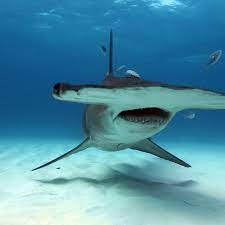

In [39]:
shark

## Preprocessing Image

In [40]:
processed_img = preprocess_fun(shark)
processed_img.shape

torch.Size([3, 224, 224])

## Prediction

In [41]:
probs = model(processed_img.unsqueeze(0))
probs = probs.softmax(1)
probs = probs[0].detach().numpy()

## Soft Probs

In [51]:
probs = probs[probs.argsort()[-5:][::-1]]
idxs = probs.argsort()[-5:]
probs, idxs

(array([0.3344042 , 0.16890197, 0.01529439, 0.01306928, 0.00889619],
       dtype=float32),
 array([4, 3, 2, 1, 0], dtype=int64))

In [52]:
categories[idxs]

array(['hammerhead', 'tiger shark', 'great white shark', 'goldfish',
       'tench'], dtype='<U30')

## Interpret Predictions

In [44]:
from captum.attr import IntegratedGradients
interptretation_algo = IntegratedGradients(model)

In [46]:
feature_imp = interptretation_algo.attribute(processed_img.unsqueeze(0), target = 3)
feature_imp.shape

torch.Size([1, 3, 224, 224])

In [47]:
feature_imp = feature_imp[0].numpy()
feature_imp = feature_imp.transpose(1, 2, 0)
feature_imp.shape

(224, 224, 3)

In [48]:
processed_img_np = processed_img.numpy().transpose(1, 2, 0)
processed_img_np.shape

(224, 224, 3)

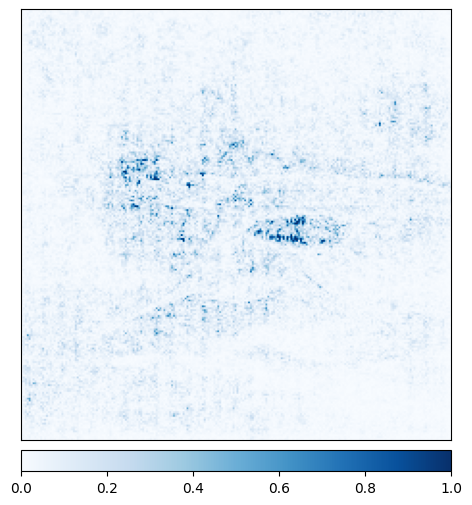

In [49]:
from captum.attr import visualization as viz
fig, ax = viz.visualize_image_attr(feature_imp, show_colorbar=True, fig_size=(6,6))

([], [])

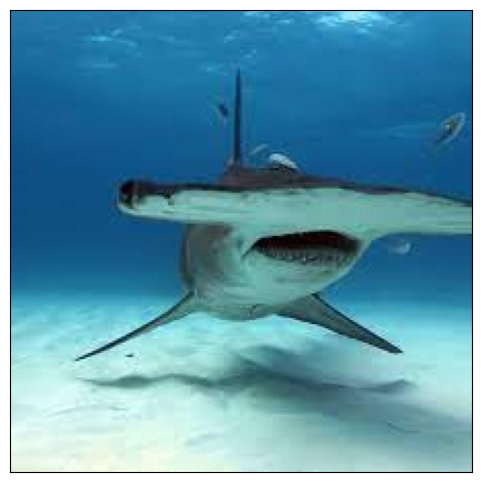

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(111)

plt.imshow(shark)
plt.xticks([], [])
plt.yticks([], [])